

# DEEP LEARNING - Medical projects

# Lung Cancer Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset Deep Learning Project/lung_cancer_examples.csv")

In [ ]:
data.head()

Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1

In [ ]:
data.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [ ]:
import seaborn as sns

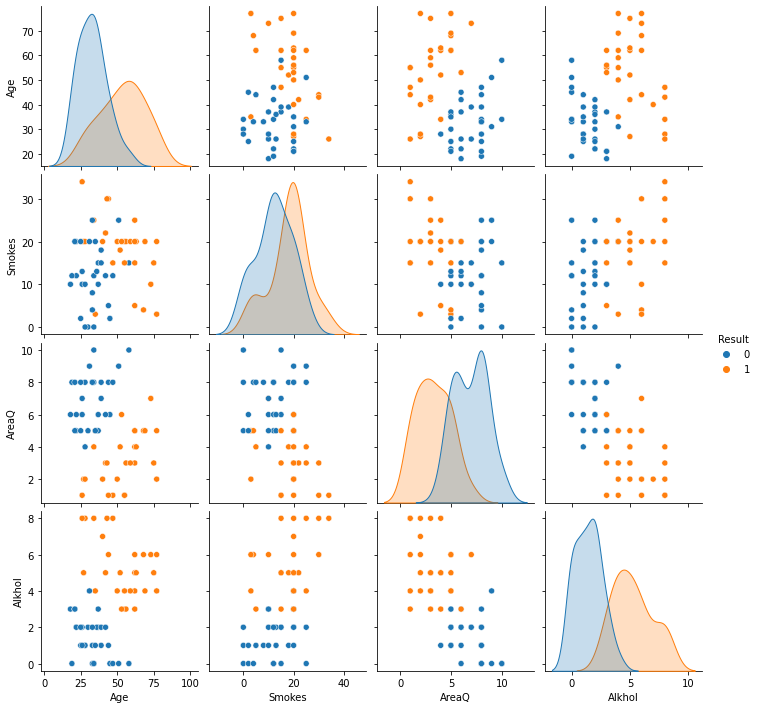

In [ ]:
sns.pairplot(data,hue="Result")

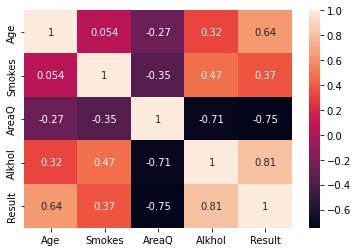

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [ ]:
x = data[['Age', 'Smokes', 'AreaQ', 'Alkhol']]
y = data["Result"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
x_train.shape , x_test.shape, x_train.shape[1]

((47, 4), (12, 4), 4)

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()
#Input Layer
model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
#Hidden Layer
model.add(Dense(64,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
2/2 [==============================] - 6s 12ms/step - loss: 0.9489 - accuracy: 0.4681
Epoch 2/20
2/2 [==============================] - 0s 8ms/step - loss: 0.6114 - accuracy: 0.6596
Epoch 3/20
2/2 [==============================] - 0s 8ms/step - loss: 0.7665 - accuracy: 0.4894
Epoch 4/20
2/2 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.5106
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 0.4777 - accuracy: 0.7872
Epoch 6/20
2/2 [==============================] - 0s 7ms/step - loss: 0.4690 - accuracy: 0.7872
Epoch 7/20
2/2 [==============================] - 0s 7ms/step - loss: 0.4826 - accuracy: 0.7021
Epoch 8/20
2/2 [==============================] - 0s 8ms/step - loss: 0.3656 - accuracy: 0.9149
Epoch 9/20
2/2 [==============================] - 0s 7ms/step - loss: 0.3554 - accuracy: 0.8511
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.3640 - accuracy: 0.8085
Epoch 11/20
2/2 [=====================

In [ ]:
pred = model.predict(x_test)
y_pred=(pred>0.5)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

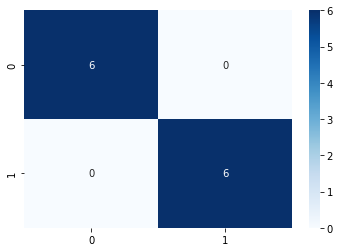

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



Hyper-parameter tuning

In [ ]:
neurons = [4,16,32,64,128]
for i in range(5):
  model=Sequential()
  #Input Layer
  model.add(Dense(neurons[i],activation='relu',input_shape=(x_train.shape[1],)))
  #Hidden Layer
  model.add(Dense(64,activation='relu'))
  #output layer
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=20,verbose=0)
  pred = model.predict(x_test)
  y_pred=(pred>0.5)
  print(f"\nAccuracy of the model with {neurons[i]}, 64 neurons in each hidden layers: ",accuracy_score(y_test,y_pred))



Accuracy of the model with 4, 64 neurons in each hidden layers:  0.4166666666666667

Accuracy of the model with 16, 64 neurons in each hidden layers:  0.8333333333333334

Accuracy of the model with 32, 64 neurons in each hidden layers:  0.9166666666666666

Accuracy of the model with 64, 64 neurons in each hidden layers:  1.0

Accuracy of the model with 128, 64 neurons in each hidden layers:  1.0


In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad
import warnings
warnings.filterwarnings("ignore")
Adam = Adam(lr=0.001)
SGD = SGD(lr=0.001)
RMSprop = RMSprop(lr=0.001)
Adadelta = Adadelta(lr=0.001)
Adagrad = Adagrad(lr=0.001)

optimizers = [Adam, SGD, RMSprop, Adadelta, Adagrad]
for i in range(5):
  model=Sequential()
  model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer=optimizers[i],metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=20,verbose=0)
  pred = model.predict(x_test)
  y_pred=(pred>0.5)
  print(f"\nAccuracy of the model with {optimizers[i]}: ",accuracy_score(y_test,y_pred))



Accuracy of the model with <keras.optimizer_v2.adam.Adam object at 0x7f3ab9a55510>:  1.0

Accuracy of the model with <keras.optimizer_v2.gradient_descent.SGD object at 0x7f3ab9a554d0>:  0.6666666666666666

Accuracy of the model with <keras.optimizer_v2.rmsprop.RMSprop object at 0x7f3ab9a55650>:  1.0

Accuracy of the model with <keras.optimizer_v2.adadelta.Adadelta object at 0x7f3ab9a51c50>:  0.6666666666666666

Accuracy of the model with <keras.optimizer_v2.adagrad.Adagrad object at 0x7f3ab9a51bd0>:  1.0


In [ ]:
data.tail()

Name   Surname  Age  Smokes  AreaQ  Alkhol  Result
54    Ernest   Borgnine   26      13      6       1       0
55      Alec   Guinness   77      20      5       4       1
56  Charlton     Heston   75      15      3       5       1
57   Gregory       Peck   43      30      3       8       1
58    Sidney    Poitier   51      25      9       0       0

In [ ]:
age = int(input("Age: "))
smoke = int(input("Smokes: "))
areaq = int(input("AreaQ: "))
alkhol = int(input("Alkhol: "))

xnew = [[age,smoke,areaq,alkhol]]
pred = model.predict(xnew)
y_pred=(pred>0.5)
if y_pred==True:
  print("The person has Lung cancer")
else:
  print("Free from lung cancer")

Age: 77
Smokes: 20
AreaQ: 5
Alkhol: 4
The person has Lung cancer


# Covid X-Rays

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255,validation_split=0.2)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset=train.flow_from_directory("//content/drive/MyDrive/xray_dataset_covid19-20220913T150100Z-001.zip (Unzipped Files)/xray_dataset_covid19/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="training")
valid_dataset=train.flow_from_directory("/content/drive/MyDrive/xray_dataset_covid19-20220913T150100Z-001.zip (Unzipped Files)/xray_dataset_covid19/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="validation")
test_dataset=test.flow_from_directory("/content/drive/MyDrive/xray_dataset_covid19-20220913T150100Z-001.zip (Unzipped Files)/xray_dataset_covid19/test",target_size=(224,224),batch_size=32,class_mode='binary')

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
covid_dir = "/content/drive/MyDrive/xray_dataset_covid19-20220913T150100Z-001.zip (Unzipped Files)/xray_dataset_covid19/train/PNEUMONIA"

normal_dir = "/content/drive/MyDrive/xray_dataset_covid19-20220913T150100Z-001.zip (Unzipped Files)/xray_dataset_covid19/train/NORMAL"


In [ ]:
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
def show_img(dir,title):
  nrows = 2
  ncols = 4
  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)
  pic_index = 10
  fnames = os.listdir( dir )
  next_pix = [os.path.join(dir, fname) 
                  for fname in fnames[ pic_index-8:pic_index] 
                ]
  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    plt.suptitle(title,fontsize = 24)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    img.shape

  plt.show()

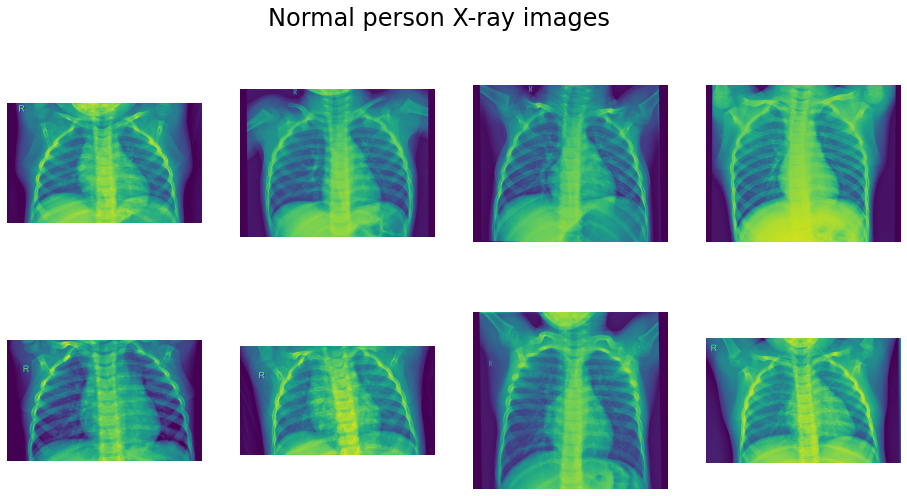

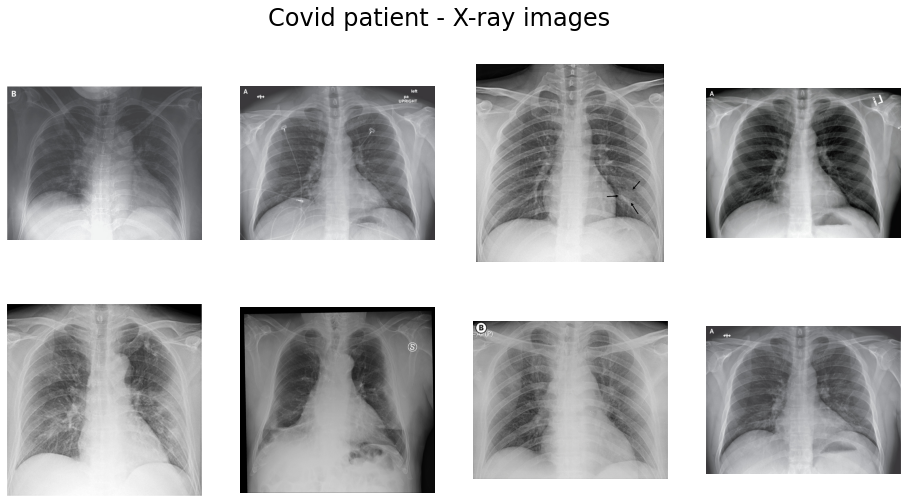

In [ ]:
show_img(normal_dir,"Normal person X-ray images")
show_img(covid_dir,"Covid patient - X-ray images")

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [ ]:

cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=(224,224,3)))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=128,kernel_size=(5,5),padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(512,activation='relu'))
cnn_model.add(Dense(4,activation='relu'))
cnn_model.add(Dense(1,activation='sigmoid'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [ ]:
#build AlexNet model
#without batch normalization
alex_model=Sequential()
alex_model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(224,224,3)))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Conv2D(filters=256,kernel_size=(5,5),padding='same',activation='relu'))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))

alex_model.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))

alex_model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Flatten())
alex_model.add(Dense(4096,activation='relu'))
alex_model.add(Dropout(0.4))
alex_model.add(Dense(4096,activation='relu'))
alex_model.add(Dropout(0.4))
alex_model.add(Dense(1,activation='sigmoid'))

alex_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 384)      

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
cnn_model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
alex_model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,
                        restore_best_weights=True)

In [ ]:
cnn_his = cnn_model.fit(train_dataset,batch_size=32,epochs=20,validation_data=valid_dataset)

Epoch 1/20
4/4 [==============================] - 54s 13s/step - loss: 0.7267 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 12s 3s/step - loss: 0.6804 - accuracy: 0.5083 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 11s 3s/step - loss: 0.6630 - accuracy: 0.6167 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 10s 2s/step - loss: 0.7162 - accuracy: 0.5333 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 10s 2s/step - loss: 0.6972 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 10s 3s/step - loss: 0.6959 - accuracy: 0.4667 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 10s 2s/step - loss: 0.6918 - accuracy: 0.6333 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 8/20
4/4 [=================

In [ ]:
alex_his=alex_model.fit(train_dataset,batch_size=32,epochs=20,validation_data=valid_dataset)

Epoch 1/20
4/4 [==============================] - 21s 5s/step - loss: 2.3716 - accuracy: 0.4500 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 19s 5s/step - loss: 0.6972 - accuracy: 0.4500 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 19s 4s/step - loss: 0.6972 - accuracy: 0.5583 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 19s 5s/step - loss: 0.7005 - accuracy: 0.4833 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 19s 5s/step - loss: 0.6872 - accuracy: 0.5000 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 19s 5s/step - loss: 0.6927 - accuracy: 0.4333 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 19s 5s/step - loss: 0.6774 - accuracy: 0.5333 - val_loss: 0.6693 - val_accuracy: 0.6786
Epoch 8/20
4/4 [==================

In [ ]:
cnn_model.evaluate(test_dataset)

2/2 [==============================] - 4s 3s/step - loss: 0.5372 - accuracy: 0.9750


[0.5371925234794617, 0.9750000238418579]

In [ ]:
alex_model.evaluate(test_dataset)

2/2 [==============================] - 2s 273ms/step - loss: 0.0719 - accuracy: 0.9750


[0.07185763120651245, 0.9750000238418579]

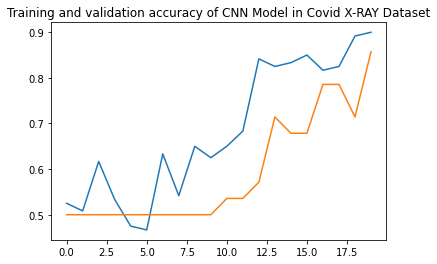

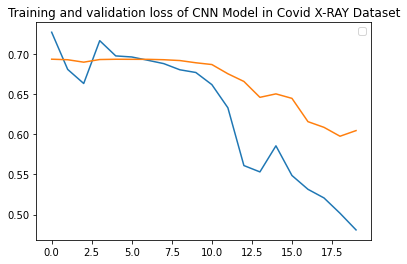

In [ ]:
from matplotlib import pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = cnn_his.history['accuracy']
val_acc = cnn_his.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = cnn_his.history['loss']
val_loss = cnn_his.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy of CNN Model in Covid X-RAY Dataset')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss of CNN Model in Covid X-RAY Dataset')

Text(0.5, 1.0, 'Training and validation loss of Alexnet Model in Covid X-RAY Dataset')

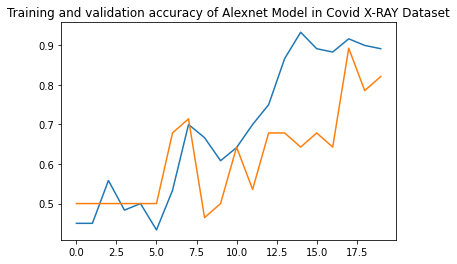

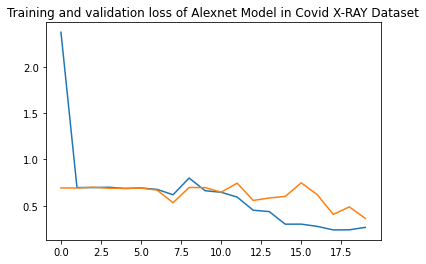

In [ ]:
acc = alex_his.history['accuracy']
val_acc = alex_his.history['val_accuracy']

loss = alex_his.history['loss']
val_loss = alex_his.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy of Alexnet Model in Covid X-RAY Dataset')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss of Alexnet Model in Covid X-RAY Dataset')

# Diabetic Retinopathy Dataset

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train1=ImageDataGenerator(rescale=1./255,validation_split=0.85)
train=ImageDataGenerator(rescale=1./255,validation_split=0.05)
test=ImageDataGenerator(rescale=1./255,validation_split=0.02)
valid=ImageDataGenerator(rescale=1./255)
train_dataset=train1.flow_from_directory("/content/drive/MyDrive/retinopathy_diabetic_detection",target_size=(224,224),batch_size=32,class_mode='categorical',subset="training")
test_dataset=train.flow_from_directory("/content/drive/MyDrive/retinopathy_diabetic_detection",target_size=(224,224),batch_size=32,class_mode='categorical',subset="validation")
valid_dataset=test.flow_from_directory("/content/drive/MyDrive/retinopathy_diabetic_detection",target_size=(224,224),batch_size=32,class_mode='categorical',subset="validation")


Found 551 images belonging to 5 classes.
Found 180 images belonging to 5 classes.
Found 70 images belonging to 5 classes.


In [ ]:
severe_dir = "/content/drive/MyDrive/retinopathy_diabetic_detection/Severe"

normal_dir = "/content/drive/MyDrive/retinopathy_diabetic_detection/No_DR"

mild_dir = "/content/drive/MyDrive/retinopathy_diabetic_detection/Mild"

proliferate_dir = "/content/drive/MyDrive/retinopathy_diabetic_detection/Proliferate_DR"

moderate_dir = "/content/drive/MyDrive/retinopathy_diabetic_detection/Moderate"

In [ ]:
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
def show_img(dir,title):
  nrows = 2
  ncols = 4
  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)
  pic_index = 10
  fnames = os.listdir( dir )
  next_pix = [os.path.join(dir, fname) 
                  for fname in fnames[ pic_index-8:pic_index] 
                ]
  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    plt.suptitle(title,fontsize = 24)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    img.shape

  plt.show()

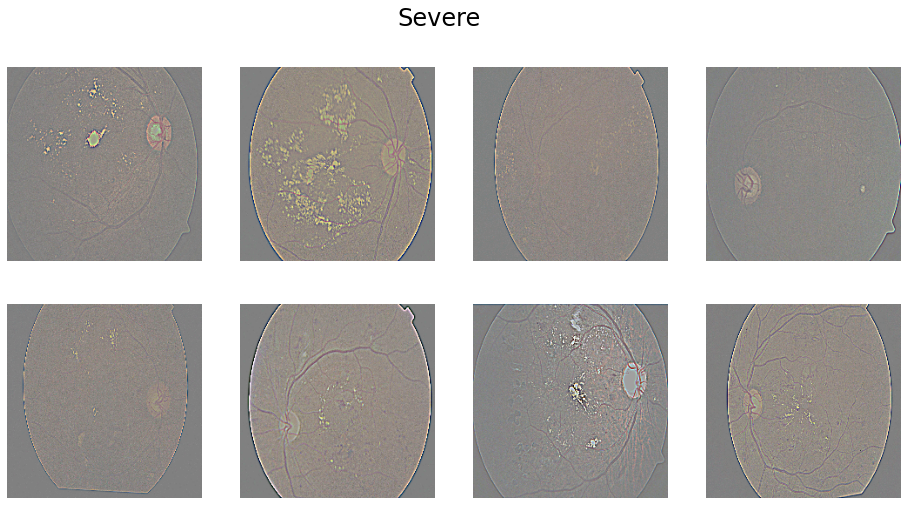

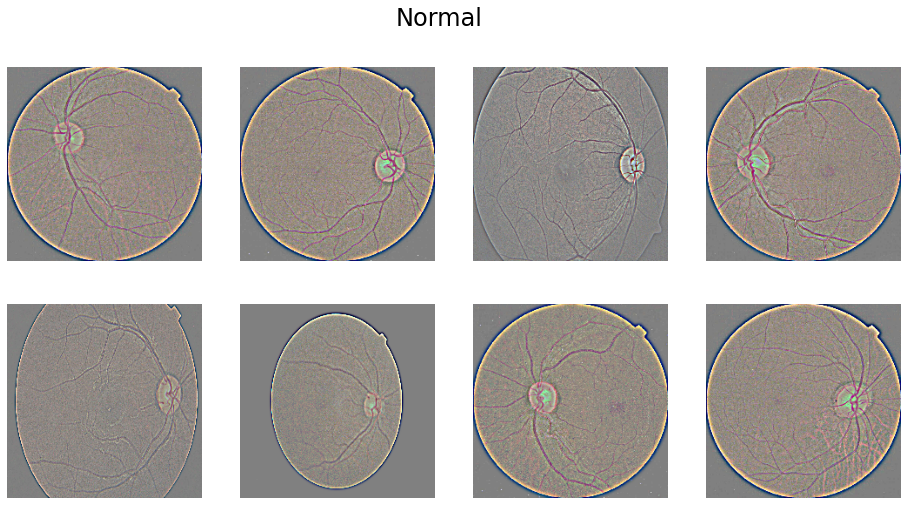

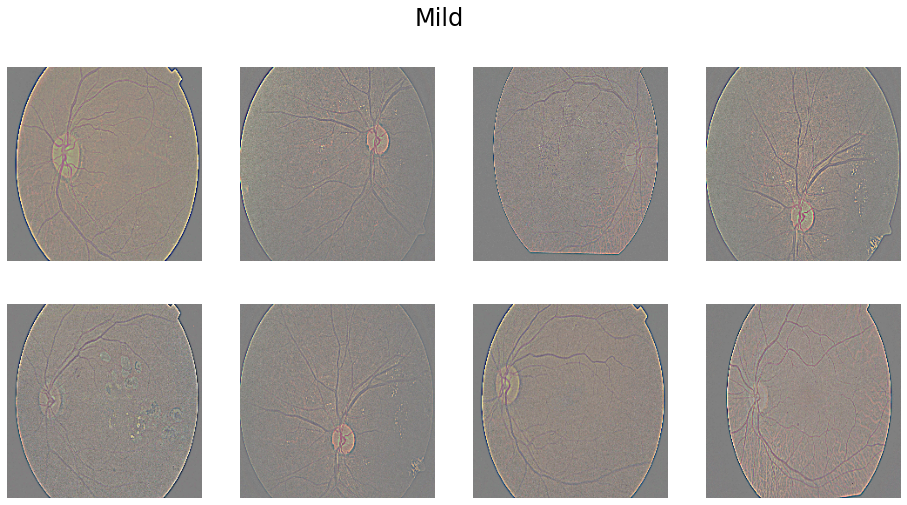

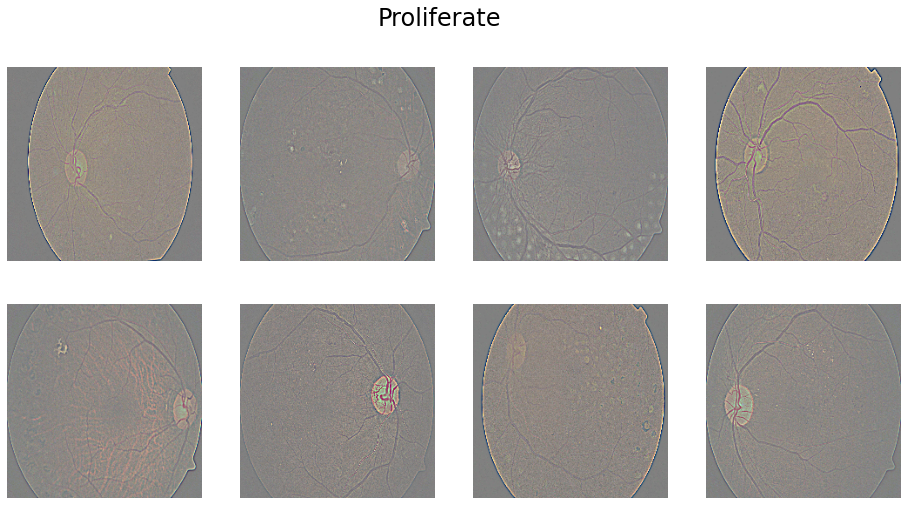

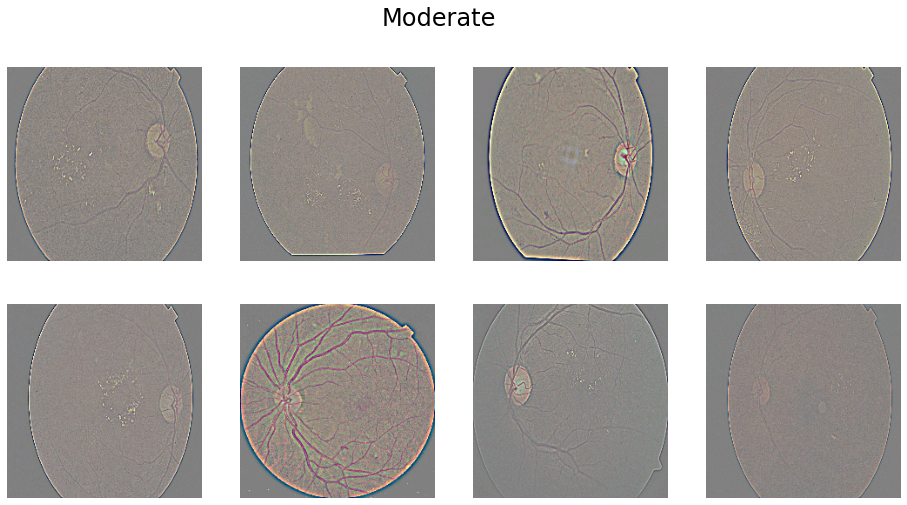

In [ ]:
show_img(severe_dir,"Severe")
show_img(normal_dir,"Normal")
show_img(mild_dir,"Mild")
show_img(proliferate_dir,"Proliferate")
show_img(moderate_dir,"Moderate")

In [ ]:

cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=(224,224,3)))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=128,kernel_size=(5,5),padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(512,activation='relu'))
cnn_model.add(Dense(4,activation='relu'))
cnn_model.add(Dense(5,activation='softmax'))

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      896       
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                  

In [ ]:
#build AlexNet model

alex_model=Sequential()
alex_model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(224,224,3)))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Conv2D(filters=256,kernel_size=(5,5),padding='same',activation='relu'))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))

alex_model.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))

alex_model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
alex_model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

alex_model.add(Flatten())
alex_model.add(Dense(4096,activation='relu'))
alex_model.add(Dropout(0.4))
alex_model.add(Dense(4096,activation='relu'))
alex_model.add(Dropout(0.4))
alex_model.add(Dense(5,activation='softmax'))

alex_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 384)       885120    
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 384)      

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
cnn_model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
alex_model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1,
                        restore_best_weights=True)

In [ ]:
cnn_his = cnn_model.fit(train_dataset,batch_size=32,epochs=20,callbacks=[earlystop],validation_data=valid_dataset)

Epoch 1/20
18/18 [==============================] - 29s 2s/step - loss: 1.4962 - accuracy: 0.4211 - val_loss: 1.5520 - val_accuracy: 0.5143
Epoch 2/20
18/18 [==============================] - 28s 2s/step - loss: 1.3918 - accuracy: 0.4864 - val_loss: 1.4876 - val_accuracy: 0.5143
Epoch 3/20
18/18 [==============================] - 28s 2s/step - loss: 1.3134 - accuracy: 0.4918 - val_loss: 1.3652 - val_accuracy: 0.5143
Epoch 4/20
18/18 [==============================] - 27s 2s/step - loss: 1.1519 - accuracy: 0.4918 - val_loss: 1.2922 - val_accuracy: 0.5143
Epoch 5/20
18/18 [==============================] - 27s 2s/step - loss: 1.0527 - accuracy: 0.4991 - val_loss: 1.0635 - val_accuracy: 0.5571
Epoch 6/20
18/18 [==============================] - 27s 2s/step - loss: 1.0146 - accuracy: 0.6207 - val_loss: 0.9988 - val_accuracy: 0.6143
Epoch 7/20
18/18 [==============================] - 27s 2s/step - loss: 1.0136 - accuracy: 0.6515 - val_loss: 1.1070 - val_accuracy: 0.6143
Epoch 8/20
18/18 [==

In [ ]:
alex_his = alex_model.fit(train_dataset,batch_size=32,epochs=20,callbacks=[earlystop],validation_data=valid_dataset)

Epoch 1/20
18/18 [==============================] - 72s 4s/step - loss: 1.2864 - accuracy: 0.4918 - val_loss: 1.1784 - val_accuracy: 0.5143
Epoch 2/20
18/18 [==============================] - 68s 4s/step - loss: 1.2786 - accuracy: 0.4737 - val_loss: 1.2717 - val_accuracy: 0.5143
Epoch 3/20
18/18 [==============================] - 70s 4s/step - loss: 1.3138 - accuracy: 0.4918 - val_loss: 1.2666 - val_accuracy: 0.5143
Epoch 4/20
18/18 [==============================] - 70s 4s/step - loss: 1.3075 - accuracy: 0.4918 - val_loss: 1.2544 - val_accuracy: 0.5143
Epoch 5/20
18/18 [==============================] - 69s 4s/step - loss: 1.3002 - accuracy: 0.4918 - val_loss: 1.2521 - val_accuracy: 0.5143
Epoch 6/20
18/18 [==============================] - 69s 4s/step - loss: 1.3031 - accuracy: 0.4918 - val_loss: 1.2605 - val_accuracy: 0.5143
Epoch 6: early stopping


In [ ]:
cnn_model.evaluate(test_dataset)

6/6 [==============================] - 2s 363ms/step - loss: 1.0436 - accuracy: 0.6222


[1.04362154006958, 0.6222222447395325]

In [ ]:
alex_model.evaluate(test_dataset)

6/6 [==============================] - 6s 945ms/step - loss: 1.2136 - accuracy: 0.5000


[1.2135668992996216, 0.5]

Text(0.5, 1.0, 'Training and validation loss of CNN Model in Diabetic Retinopathy Dataset')

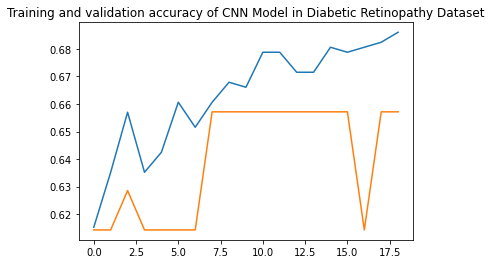

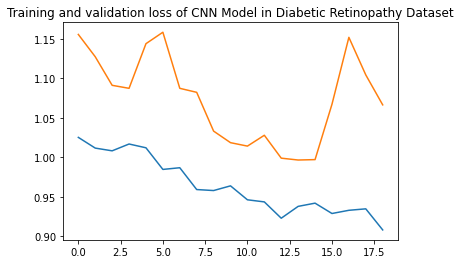

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = cnn_his.history['accuracy']
val_acc = cnn_his.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = cnn_his.history['loss']
val_loss = cnn_his.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy of CNN Model in Diabetic Retinopathy Dataset')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss of CNN Model in Diabetic Retinopathy Dataset')

Text(0.5, 1.0, 'Training and validation loss of Alexnet Model in Diabetic Retinopathy Dataset')

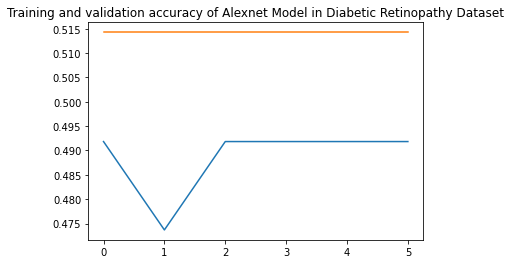

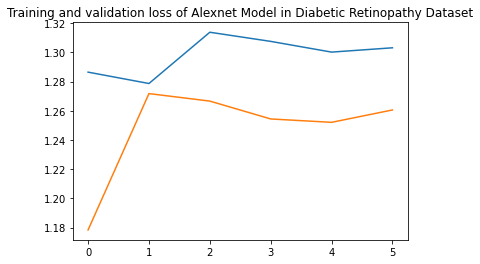

In [ ]:
acc = alex_his.history['accuracy']
val_acc = alex_his.history['val_accuracy']

loss = alex_his.history['loss']
val_loss = alex_his.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy of Alexnet Model in Diabetic Retinopathy Dataset')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss of Alexnet Model in Diabetic Retinopathy Dataset')

Saving the weights of the best model

In [ ]:
model_final.save("/content/MyDrive/models/diabeticretino.h5")
print("Saved model to disk")
model_final.save_weights("/content/MyDrive/models/diabeticretino.h5")
print("Saved weights to disk")